# Pr. Romain test on the energy consumption of algorithms

In [44]:
# Import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [45]:
# Import Sklearn metric libraries
from sklearn.metrics import accuracy_score

In [46]:
# Importing the load_digit classification dataset
from sklearn.datasets import load_digits

In [47]:
# Load classification dataset load_digit
digits = load_digits()

X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


In [48]:
# Division of the dataset into a train set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state= 5)

print('train set : ', X_train.shape)
print('test set : ', X_test.shape)

train set :  (1437, 64)
test set :  (360, 64)


## Implementation

In [49]:
# Importing PyJoules library packages
from pyJoules.device.rapl_device import RaplPackageDomain
from pyJoules.handler.pandas_handler import PandasHandler
from pyJoules.energy_meter import EnergyContext

In [50]:
def train_models(models):
    dict_of_dataframe = {}
    for model in models:
        pandas_handler = PandasHandler()   
        list_of_score = []
        for i in range(1, 5):
            model_name = "training_"+str(i)
            # Measurement of energy consumption for each workout
            with EnergyContext(handler=pandas_handler, domains=[RaplPackageDomain(0)], start_tag=model_name) as ctx:
                my_model = model
                # Division of the train set into several sub-parts
                X_t, X_other, y_t, X_other = train_test_split(X_train, y_train, test_size = (1 -  (1- (i * 0.2))),  random_state= 42)
                my_model.fit(X_t, y_t)
                y_pred = my_model.predict(X_test)
                # Recovery of the accuracy of the different models
                list_of_score.append(accuracy_score(y_test, y_pred))

        # Recovery of training values and energies
        df = pandas_handler.get_dataframe()
        df["accuracy"] = pd.Series(list_of_score)
        dict_of_dataframe[model.__class__.__name__] = df
    return dict_of_dataframe
    

In [51]:
def plot_cost(dict_of_dataframe):
    # Plotting graphs for each model
    for keys, values in dict_of_dataframe.items():
        plt.figure()
        sns.lineplot(x="accuracy", y="package_0", data=values)
        sns.axes_style('darkgrid')
        plt.title('Cost of traning a '+keys)
        plt.xlabel('Accuracy')
        plt.ylabel('Energy consumed')
        plt.plot(marker = 'o')
        plt.grid()

## Testing

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [53]:
models = [SVC(gamma='scale'), SGDClassifier(), DecisionTreeClassifier(), KNeighborsClassifier() ]

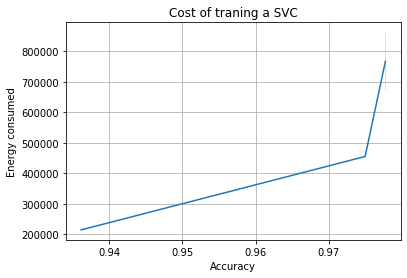

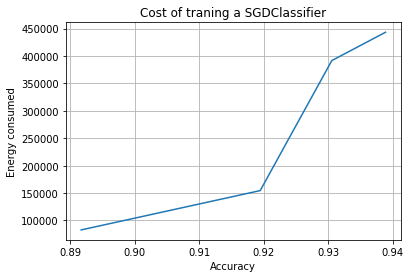

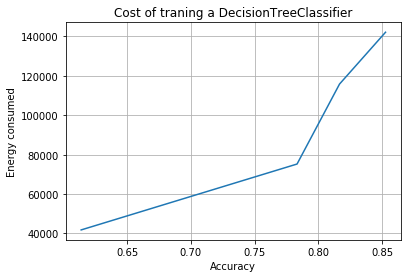

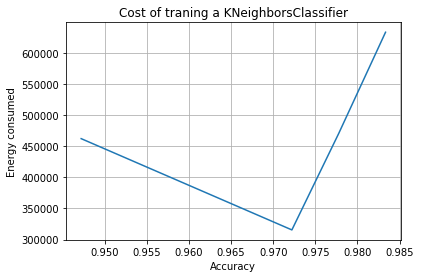

In [59]:
plot_cost(train_models(models))